In [ ]:
!unzip data.zip

Archive:  data.zip
replace data/BG/raw-documents/A6_CC_BG_10015.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd

# Load the annotation file
annotations_path = "/content/data/EN/subtask-2-annotations.txt"
annotations_df = pd.read_csv(annotations_path, sep='\t', header=None, names=["file_name", "high_level", "sub_level"])

# Display the first few rows of the dataframe
print(annotations_df.head())

# Count the frequency of each high-level narrative
high_level_counts = annotations_df["high_level"].value_counts()
print("\nHigh-Level Narrative Counts:\n", high_level_counts)

# Count the frequency of each sub-level narrative
sub_level_counts = annotations_df["sub_level"].value_counts()
print("\nSub-Level Narrative Counts:\n", sub_level_counts)

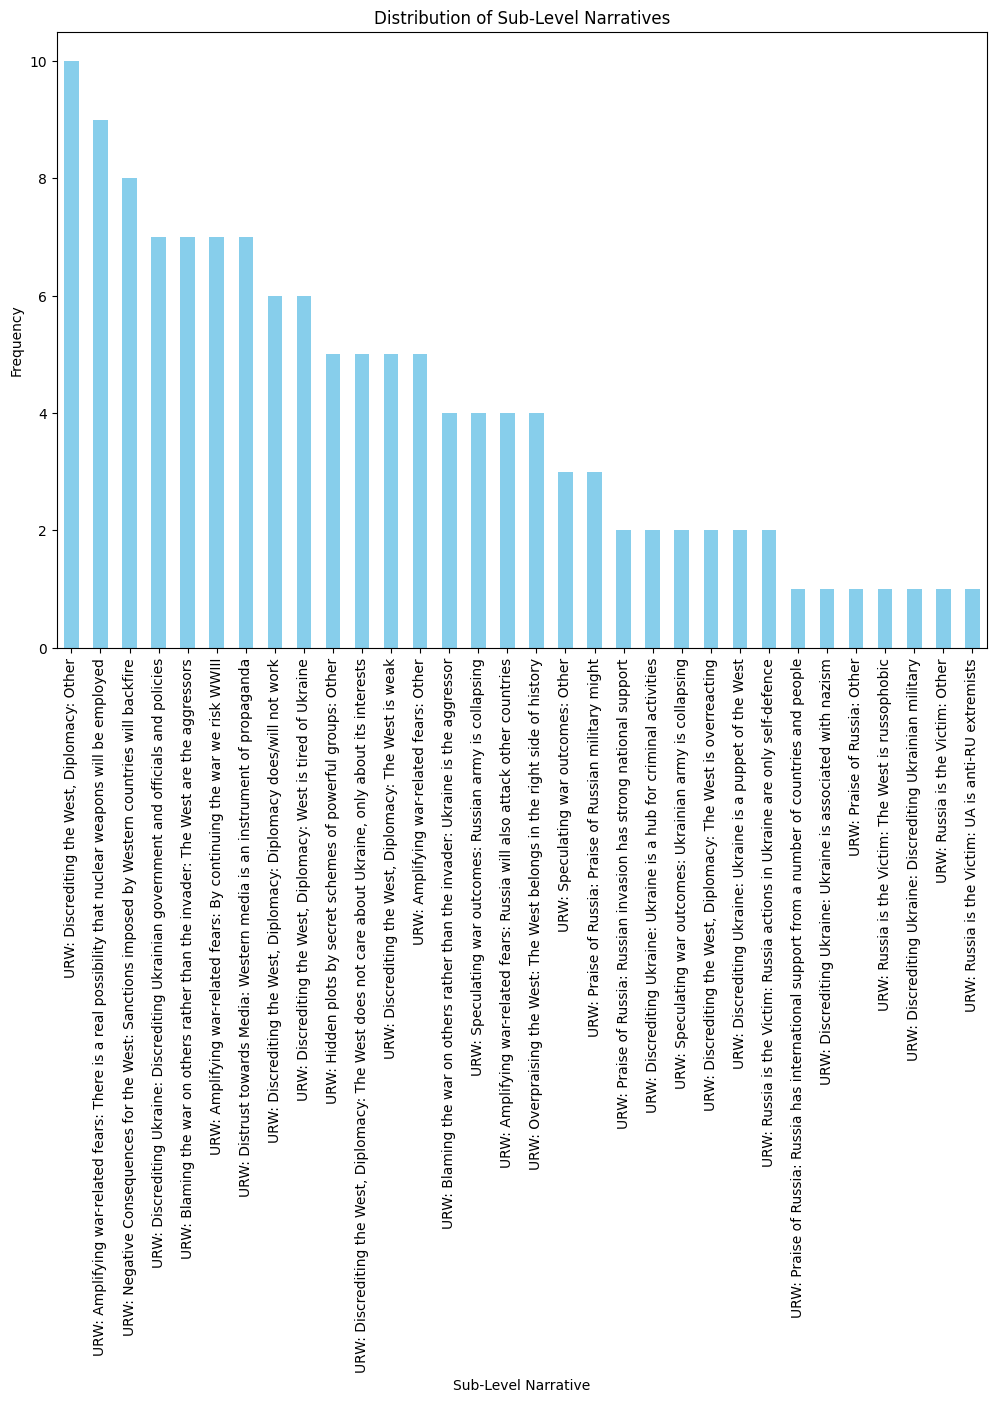

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of sub-level narratives
plt.figure(figsize=(12, 8))
sub_level_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Sub-Level Narratives")
plt.xlabel("Sub-Level Narrative")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

In [ ]:
import os

# Path to raw documents
raw_docs_path = "/content/data/EN/raw-documents"

# Function to load and display a raw document
def display_raw_document(file_name):
    file_path = os.path.join(raw_docs_path, file_name)
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
    return content

# Display a few raw documents with their annotations
for _, row in annotations_df.head(5).iterrows():
    file_name = row["file_name"]
    high_level = row["high_level"]
    sub_level = row["sub_level"]
    content = display_raw_document(file_name)

    print(f"File: {file_name}")
    print(f"High-Level: {high_level}")
    print(f"Sub-Level: {sub_level}")
    print("Content:")
    print(content[:500])  # Display the first 500 characters
    print("\n" + "="*80 + "\n")

File: EN_CC_100013.txt
High-Level: CC: Criticism of climate movement
Sub-Level: CC: Criticism of climate movement: Ad hominem attacks on key activists
Content:
Bill Gates Says He Is ‘The Solution’ To Climate Change So It’s OK To Own Four Private Jets 

Bill Gates has the right to fly around the world on private jets while normal people are forced to live in 15 minute cities without freedom of travel, according to Bill Gates himself, who told the BBC he is doing much more than anybody else to fight climate change.

Gates claimed that because he continues to “spend billions of dollars” on climate change activism, his carbon footprint isn’t an issue.

Sig


File: EN_UA_300009.txt
High-Level: Other
Sub-Level: Other
Content:
Russia: Clashes erupt in Bashkortostan as rights activist sentenced 

 Russian riot police clashed with protesters in Bashkortostan following the sentencing of rights activist Fail Alsynov to four years in a penal colony. Social media footage captured the confrontations

In [ ]:
# Group sub-level narratives by high-level narratives
grouped_sub_levels = annotations_df.groupby("high_level")["sub_level"].value_counts()

# Display the grouped sub-level narratives
for high_level, sub_level_counts in grouped_sub_levels.groupby(level=0):
    print(f"High-Level: {high_level}")
    print(sub_level_counts)
    print("\n" + "-" * 80 + "\n")

In [ ]:
# Set the number of top sub-level narratives to display
N = 20

# Get the top N most frequent sub-level narratives
top_sub_levels = sub_level_counts.head(N)

# Display the top N sub-level narratives
print(f"Top {N} Most Frequent Sub-Level Narratives:")
print(top_sub_levels)

In [ ]:
# Select a specific sub-level narrative to analyze
target_sub_level = "CC: Criticism of climate movement: Ad hominem attacks on key activists"

# Filter the annotations for the target sub-level narrative
target_annotations = annotations_df[annotations_df["sub_level"] == target_sub_level]

# Display the raw text for the first few documents with the target sub-level narrative
for _, row in target_annotations.head(3).iterrows():
    file_name = row["file_name"]
    content = display_raw_document(file_name)

    print(f"File: {file_name}")
    print(f"Sub-Level: {target_sub_level}")
    print("Content:")
    print(content[:1000])  # Display the first 1000 characters
    print("\n" + "=" * 80 + "\n")

In [ ]:
import pandas as pd

# Load the annotation file
annotations_path = "/content/data/EN/subtask-2-annotations.txt"
annotations_df = pd.read_csv(annotations_path, sep='\t', header=None, names=["file_name", "high_level", "sub_level"])

# Group sub-level narratives by high-level narratives
grouped_sub_levels = annotations_df.groupby("high_level")["sub_level"].value_counts()

# Display the grouped sub-level narratives
for high_level, sub_level_counts in grouped_sub_levels.groupby(level=0):
    print(f"High-Level: {high_level}")
    print(sub_level_counts)

In [ ]:
import pandas as pd

# Load the annotation file
annotations_path = "/content/data/EN/subtask-2-annotations.txt"
df = pd.read_csv(annotations_path, sep='\t', header=None, names=["file_name", "high_level", "sub_level"])

# Filter only URW data
urw_df = df[df['high_level'].str.contains('URW:', na=False)]

# Count unique combinations of high-level and sub-level
urw_pairs = urw_df.groupby(['high_level', 'sub_level']).size().reset_index(name='count')

print("Number of URW documents:", len(urw_df))
print("\nDistribution of high-level to sub-level pairs:")
print(urw_pairs)

In [ ]:
# Let's clean up the high-level and sub-level columns to get the base categories
def clean_category(text):
    # Take the first URW category if multiple exist
    categories = [cat.strip() for cat in text.split(';') if 'URW:' in cat]
    if categories:
        return categories[0]
    return text

# Clean the data
urw_df['base_high_level'] = urw_df['high_level'].apply(clean_category)
urw_df['base_sub_level'] = urw_df['sub_level'].apply(clean_category)

# Get distribution of base categories
high_level_dist = urw_df['base_high_level'].value_counts()
sub_level_dist = urw_df['base_sub_level'].value_counts()

# Show relationship between high-level and their sub-levels
relationship_df = urw_df.groupby('base_high_level')['base_sub_level'].agg(['unique', 'count'])

print("High-level distribution:")
print(high_level_dist)
print("\nNumber of unique sub-levels for each high-level:")
print(relationship_df)

In [ ]:
# Let's look more deeply at the sub-level distribution within each high-level
# This will help us understand the complexity of the classification task

def analyze_sublevel_distribution():
    # Group by high-level and count sub-levels
    for high_level in urw_df['base_high_level'].unique():
        sub_levels = urw_df[urw_df['base_high_level'] == high_level]['base_sub_level'].value_counts()
        print(f"\nHigh Level: {high_level}")
        print("Number of unique sub-levels:", len(sub_levels))
        print("Sub-level distribution:")
        print(sub_levels)
        print("-" * 50)

# Run this analysis
analyze_sublevel_distribution()

HERE IS START OF TRAINING

In [ ]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModel
import torch
from torch import nn

# 1. First, let's prepare our data
def prepare_urw_data():
    # Load annotations
    annotations_path = "/content/data/EN/subtask-2-annotations.txt"
    df = pd.read_csv(annotations_path, sep='\t', header=None, names=["file_name", "high_level", "sub_level"])

    # Filter only URW data
    urw_df = df[df['high_level'].str.contains('URW:', na=False)].copy()

    # Clean high-level and sub-level labels
    def clean_category(text):
        categories = [cat.strip() for cat in text.split(';') if 'URW:' in cat]
        return categories[0] if categories else text

    urw_df['base_high_level'] = urw_df['high_level'].apply(clean_category)
    urw_df['base_sub_level'] = urw_df['sub_level'].apply(clean_category)

    # Create label encoders for high and sub levels
    high_level_mapping = {label: idx for idx, label in enumerate(urw_df['base_high_level'].unique())}
    sub_level_mapping = {label: idx for idx, label in enumerate(urw_df['base_sub_level'].unique())}

    # Load raw text
    def load_raw_text(filename):
        with open(f"/content/data/EN/raw-documents/{filename}", 'r', encoding='utf-8') as f:
            return f.read()

    urw_df['raw_text'] = urw_df['file_name'].apply(load_raw_text)

    return urw_df, high_level_mapping, sub_level_mapping

# Let's test this first part
urw_df, high_level_mapping, sub_level_mapping = prepare_urw_data()

print("Dataset size:", len(urw_df))
print("\nNumber of unique high-level categories:", len(high_level_mapping))
print("Number of unique sub-level categories:", len(sub_level_mapping))
print("\nSample of the prepared data:")
print(urw_df[['base_high_level', 'base_sub_level', 'raw_text']].head(2))

Dataset size: 128

Number of unique high-level categories: 11
Number of unique sub-level categories: 32

Sample of the prepared data:
                  base_high_level  \
10  URW: Speculating war outcomes   
11          URW: Praise of Russia   

                                       base_sub_level  \
10  URW: Speculating war outcomes: Russian army is...   
11  URW: Praise of Russia: Russia has internationa...   

                                             raw_text  
10  Putin’s masses of HIV-positive prisoners choos...  
11  After North Korea’s Kim Jong Un, Putin and Xi ...  


In [ ]:
import torch
from torch import nn
from transformers import AutoTokenizer, AutoModel
from torch.utils.data import Dataset, DataLoader

# 1. First, let's create our dataset class
class URWDataset(Dataset):
    def __init__(self, df, high_level_mapping, sub_level_mapping, tokenizer_name='bert-base-uncased', max_length=512):
        self.texts = df['raw_text'].tolist()
        self.high_levels = df['base_high_level'].map(high_level_mapping).tolist()
        self.sub_levels = df['base_sub_level'].map(sub_level_mapping).tolist()

        self.tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
        self.max_length = max_length

        self.num_high_levels = len(high_level_mapping)
        self.num_sub_levels = len(sub_level_mapping)

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        high_level = self.high_levels[idx]
        sub_level = self.sub_levels[idx]

        # Tokenize text
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'high_level': torch.tensor(high_level, dtype=torch.long),
            'sub_level': torch.tensor(sub_level, dtype=torch.long)
        }

# 2. Create the model
class URWSubLevelClassifier(nn.Module):
    def __init__(self, num_high_levels, num_sub_levels, high_level_embedding_dim=64):
        super().__init__()
        self.bert = AutoModel.from_pretrained('bert-base-uncased')
        self.high_level_embedding = nn.Embedding(num_high_levels, high_level_embedding_dim)

        # Combine BERT output (768) with high-level embedding
        combined_dim = 768 + high_level_embedding_dim

        self.classifier = nn.Sequential(
            nn.Linear(combined_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, num_sub_levels)
        )

    def forward(self, input_ids, attention_mask, high_level):
        # Get BERT embeddings
        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        text_embedding = bert_output.last_hidden_state[:, 0, :]  # [CLS] token

        # Get high-level embedding
        high_level_emb = self.high_level_embedding(high_level)

        # Combine embeddings
        combined = torch.cat([text_embedding, high_level_emb], dim=1)

        # Classify
        logits = self.classifier(combined)
        return logits

# 3. Let's test it with a small batch
def test_model():
    # Create dataset
    dataset = URWDataset(urw_df, high_level_mapping, sub_level_mapping)

    # Create dataloader
    loader = DataLoader(dataset, batch_size=2, shuffle=True)

    # Initialize model
    model = URWSubLevelClassifier(
        num_high_levels=len(high_level_mapping),
        num_sub_levels=len(sub_level_mapping)
    )

    # Get a batch
    batch = next(iter(loader))

    # Run model
    outputs = model(
        input_ids=batch['input_ids'],
        attention_mask=batch['attention_mask'],
        high_level=batch['high_level']
    )

    print("Output shape:", outputs.shape)
    print("Expected shape: [batch_size, num_sub_levels]")

# Test the model
test_model()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Output shape: torch.Size([2, 32])
Expected shape: [batch_size, num_sub_levels]


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel, get_cosine_schedule_with_warmup
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import torch.optim as optim

class FocalLoss(nn.Module):
    def __init__(self, weight=None, gamma=1.2):
        super().__init__()
        self.weight = weight
        self.gamma = gamma

    def forward(self, input, target):
        log_prob = F.log_softmax(input, dim=-1)
        prob = torch.exp(log_prob)
        return F.nll_loss(
            ((1 - prob) ** self.gamma) * log_prob,
            target,
            weight=self.weight
        )

class URWDataset(Dataset):
    def __init__(self, df, high_level_mapping, sub_level_mapping, tokenizer_name='bert-base-uncased', max_length=512):
        self.texts = df['raw_text'].tolist()
        self.high_levels = df['base_high_level'].map(high_level_mapping).tolist()
        self.sub_levels = df['base_sub_level'].map(sub_level_mapping).tolist()

        # Concatenate high-level category with text
        self.texts = [f"[CLS] {high_level} [SEP] {text}" for high_level, text
                     in zip(df['base_high_level'], self.texts)]

        self.tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        high_level = self.high_levels[idx]
        sub_level = self.sub_levels[idx]

        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'high_level': torch.tensor(high_level, dtype=torch.long),
            'sub_level': torch.tensor(sub_level, dtype=torch.long)
        }

class URWSubLevelClassifier(nn.Module):
    def __init__(self, num_high_levels, num_sub_levels):
        super().__init__()
        self.bert = AutoModel.from_pretrained('bert-base-uncased')

        # Selective unfreezing
        for param in self.bert.parameters():
            param.requires_grad = False
        # Unfreeze only last 3 layers
        for i in range(-3, 0):
            for param in self.bert.encoder.layer[i].parameters():
                param.requires_grad = True

        self.hidden_size = 768
        self.intermediate_size = 1024

        self.high_level_proj = nn.Sequential(
            nn.Linear(self.hidden_size, self.intermediate_size),
            nn.LayerNorm(self.intermediate_size),
            nn.GELU(),
            nn.Dropout(0.1)
        )

        self.classifier = nn.Sequential(
            nn.Linear(self.hidden_size + self.intermediate_size, self.intermediate_size),
            nn.LayerNorm(self.intermediate_size),
            nn.GELU(),
            nn.Dropout(0.2),
            nn.Linear(self.intermediate_size, 512),
            nn.LayerNorm(512),
            nn.GELU(),
            nn.Dropout(0.1),
            nn.Linear(512, num_sub_levels)
        )

        self.high_level_embedding = nn.Embedding(num_high_levels, self.hidden_size)

    def forward(self, input_ids, attention_mask, high_level):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0]

        high_level_emb = self.high_level_embedding(high_level)
        high_level_features = self.high_level_proj(high_level_emb)

        combined = torch.cat([pooled_output, high_level_features], dim=1)
        return self.classifier(combined)

def calculate_metrics(y_true, y_pred):
    if torch.is_tensor(y_true):
        y_true = y_true.cpu().numpy()
    if torch.is_tensor(y_pred):
        y_pred = y_pred.cpu().numpy()

    accuracy = (y_true == y_pred).mean()
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')

    return accuracy, f1_macro, f1_weighted

def calculate_class_weights(df, sub_level_mapping):
    sub_level_counts = df['base_sub_level'].value_counts()
    total_samples = len(df)
    weights = []

    for sub_level in sorted(sub_level_mapping.keys()):
        count = sub_level_counts.get(sub_level, 0)
        weight = 1.0 / (count / total_samples) if count > 0 else 1.0
        weights.append(weight)

    return torch.FloatTensor(weights)

def train_model(model, train_loader, val_loader, num_epochs=25):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)

    # Print batch size information
    for batch in train_loader:
        print(f"Batch size shape: {batch['input_ids'].shape}")
        break

    optimizer = optim.AdamW([
        {'params': model.bert.parameters(), 'lr': 3e-5},
        {'params': model.classifier.parameters(), 'lr': 5e-4},
        {'params': model.high_level_embedding.parameters(), 'lr': 5e-4},
        {'params': model.high_level_proj.parameters(), 'lr': 5e-4}
    ], weight_decay=0.01)

    scheduler = optim.lr_scheduler.OneCycleLR(
        optimizer,
        max_lr=[3e-5, 5e-4, 5e-4, 5e-4],
        epochs=num_epochs,
        steps_per_epoch=len(train_loader),
        pct_start=0.2,
        anneal_strategy='cos'
    )

    class_weights = calculate_class_weights(urw_df, sub_level_mapping)
    criterion = FocalLoss(weight=class_weights.to(device))

    best_val_f1 = 0
    patience = 8
    no_improve = 0

    for epoch in range(num_epochs):
        # Training
        model.train()
        train_losses = []
        train_preds = []
        train_labels = []

        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            high_level = batch['high_level'].to(device)
            sub_level = batch['sub_level'].to(device)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask, high_level)
            loss = criterion(outputs, sub_level)

            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            scheduler.step()

            train_losses.append(loss.item())
            _, preds = torch.max(outputs, dim=1)
            train_preds.extend(preds.cpu().numpy())
            train_labels.extend(sub_level.cpu().numpy())

        train_acc, train_f1_macro, train_f1_weighted = calculate_metrics(
            np.array(train_labels),
            np.array(train_preds)
        )

        # Validation
        model.eval()
        val_losses = []
        val_preds = []
        val_labels = []

        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                high_level = batch['high_level'].to(device)
                sub_level = batch['sub_level'].to(device)

                outputs = model(input_ids, attention_mask, high_level)
                loss = criterion(outputs, sub_level)

                val_losses.append(loss.item())
                _, preds = torch.max(outputs, dim=1)
                val_preds.extend(preds.cpu().numpy())
                val_labels.extend(sub_level.cpu().numpy())

        val_acc, val_f1_macro, val_f1_weighted = calculate_metrics(
            np.array(val_labels),
            np.array(val_preds)
        )

        print(f'Epoch {epoch+1}:')
        print(f'Training - Loss: {np.mean(train_losses):.4f}, Acc: {train_acc:.4f}, '
              f'F1 Macro: {train_f1_macro:.4f}, F1 Weighted: {train_f1_weighted:.4f}')
        print(f'Validation - Loss: {np.mean(val_losses):.4f}, Acc: {val_acc:.4f}, '
              f'F1 Macro: {val_f1_macro:.4f}, F1 Weighted: {val_f1_weighted:.4f}')
        print('-' * 80)

        if val_f1_weighted > best_val_f1:
            best_val_f1 = val_f1_weighted
            torch.save(model.state_dict(), 'best_model.pt')
            no_improve = 0
        else:
            no_improve += 1
            if no_improve >= patience:
                print("Early stopping triggered")
                break

def prepare_and_train():
    train_df, val_df = train_test_split(
        urw_df,
        test_size=0.2,
        stratify=urw_df['base_high_level'],
        random_state=42
    )

    train_dataset = URWDataset(train_df, high_level_mapping, sub_level_mapping)
    val_dataset = URWDataset(val_df, high_level_mapping, sub_level_mapping)

    train_loader = DataLoader(
        train_dataset,
        batch_size=32,
        shuffle=True,
        num_workers=4,
        pin_memory=True
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=32,
        num_workers=4,
        pin_memory=True
    )

    model = URWSubLevelClassifier(
        num_high_levels=len(high_level_mapping),
        num_sub_levels=len(sub_level_mapping)
    )

    train_model(model, train_loader, val_loader)

# Run training
prepare_and_train()

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Epoch 1:
Training - Loss: 201.8094, Acc: 0.0686, F1 Macro: 0.0503, F1 Weighted: 0.0418
Validation - Loss: 161.5631, Acc: 0.1538, F1 Macro: 0.0855, F1 Weighted: 0.1256
--------------------------------------------------------------------------------
Epoch 2:
Training - Loss: 169.9564, Acc: 0.1471, F1 Macro: 0.0606, F1 Weighted: 0.1152
Validation - Loss: 124.0435, Acc: 0.1923, F1 Macro: 0.0917, F1 Weighted: 0.1026
--------------------------------------------------------------------------------
Epoch 3:
Training - Loss: 139.9262, Acc: 0.2451, F1 Macro: 0.1072, F1 Weighted: 0.1513
Validation - Loss: 99.5570, Acc: 0.3462, F1 Macro: 0.2494, F1 Weighted: 0.2619
--------------------------------------------------------------------------------
Epoch 4:
Training - Loss: 116.6731, Acc: 0.3627, F1 Macro: 0.2227, F1 Weighted: 0.3036
Validation - Loss: 84.4688, Acc: 0.3846, F1 Macro: 0.2712, F1 Weighted: 0.3179
--------------------------------------------------------------------------------
Epoch 5:
T

In [ ]:
# Check label distribution
print("Sub-level label distribution:")
sub_level_counts = urw_df['base_sub_level'].value_counts()
print(sub_level_counts)

print("\nSample sizes:")
print(f"Total samples: {len(urw_df)}")
print(f"Number of sub-levels: {len(sub_level_mapping)}")

# Check if there are any very long texts
text_lengths = urw_df['raw_text'].str.len()
print("\nText length statistics:")
print(f"Mean length: {text_lengths.mean():.0f}")
print(f"Max length: {text_lengths.max()}")
print(f"Min length: {text_lengths.min()}")

Sub-level label distribution:
base_sub_level
URW: Discrediting the West, Diplomacy: Other                                                             10
URW: Amplifying war-related fears: There is a real possibility that nuclear weapons will be employed      9
URW: Negative Consequences for the West: Sanctions imposed by Western countries will backfire             8
URW: Discrediting Ukraine: Discrediting Ukrainian government and officials and policies                   7
URW: Blaming the war on others rather than the invader: The West are the aggressors                       7
URW: Amplifying war-related fears: By continuing the war we risk WWIII                                    7
URW: Distrust towards Media: Western media is an instrument of propaganda                                 7
URW: Discrediting the West, Diplomacy: Diplomacy does/will not work                                       6
URW: Discrediting the West, Diplomacy: West is tired of Ukraine                            